# Perform Experiments with DeepFace on LFW dataset

In [20]:
# built-in dependencies
import os

# 3rd party dependencies
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_pairs
from deepface import DeepFace

In [21]:
print(f"This experiment is done with pip package of deepface with {DeepFace.__version__} version")

This experiment is done with pip package of deepface with 0.0.92 version


### Configuration Sets

In [40]:
# all configuration alternatives for 4 dimensions of arguments
alignment = [True, False]
models = ["Facenet512"]
detectors = ["yolov8"]
metrics = ["euclidean", "euclidean_l2", "cosine"]
distance_metrics = ["euclidean", "euclidean_l2", "cosine"]
expand_percentage = 0

### Create Required Folders if necessary

In [23]:
target_paths = ["lfwe", "dataset", "outputs", "outputs/test", "results","lfwe/test"]
for target_path in target_paths:
    if os.path.exists(target_path) != True:
        os.mkdir(target_path)
        print(f"{target_path} is just created")

### Load LFW Dataset

In [24]:
pairs_touch = "outputs/test_lfwe.txt"
instances = 1000 #pairs.shape[0]

In [25]:
target_path = "dataset/test_lfw.npy"
labels_path = "dataset/test_labels.npy"

if os.path.exists(target_path) != True:
    fetch_lfw_pairs = fetch_lfw_pairs(subset = 'test', color = True
                                  , resize = 2
                                  , funneled = False
                                  , slice_=None
                                 )
    pairs = fetch_lfw_pairs.pairs
    labels = fetch_lfw_pairs.target
    target_names = fetch_lfw_pairs.target_names
    np.save(target_path, pairs)
    np.save(labels_path, labels)
else:
    if os.path.exists(pairs_touch) != True:
        # loading pairs takes some time. but if we extract these pairs as image, no need to load it anymore
        pairs = np.load(target_path)
    labels = np.load(labels_path)

### Save LFW image pairs into file system

In [26]:
for i in tqdm(range(0, instances)):
    img1_target = f"lfwe/test/{i}_1.jpg"
    img2_target = f"lfwe/test/{i}_2.jpg"

    if os.path.exists(img1_target) != True:
        img1 = pairs[i][0]
        # plt.imsave(img1_target, img1/255) #works for my mac
        plt.imsave(img1_target, img1) #works for my debian

    if os.path.exists(img2_target) != True:
        img2 = pairs[i][1]
        # plt.imsave(img2_target, img2/255) #works for my mac
        plt.imsave(img2_target, img2) #works for my debian

if os.path.exists(pairs_touch) != True:
    open(pairs_touch,'a').close()

100%|██████████| 1000/1000 [00:00<00:00, 46943.98it/s]


### Perform Experiments

This block will save the experiments results in outputs folder

In [29]:
for model_name in models:
    for detector_backend in detectors:
        for distance_metric in metrics:
            for align in alignment:

                if detector_backend == "skip" and align is True:
                    # Alignment is not possible for a skipped detector configuration
                    continue

                alignment_text = "aligned" if align is True else "unaligned"
                task = f"{model_name}_{detector_backend}_{distance_metric}_{alignment_text}"
                output_file = f"outputs/test/{task}.csv"
                if os.path.exists(output_file) is True:
                     #print(f"{output_file} is available already")
                     continue

                distances = []
                for i in tqdm(range(0, instances), desc = task):
                    img1_target = f"lfwe/test/{i}_1.jpg"
                    img2_target = f"lfwe/test/{i}_2.jpg"
                    result = DeepFace.verify(
                        img1_path=img1_target,
                        img2_path=img2_target,
                        model_name=model_name,
                        detector_backend=detector_backend,
                        distance_metric=distance_metric,
                        align=align,
                        enforce_detection=False,
                        expand_percentage=expand_percentage,
                    )
                    distance = result["distance"]
                    distances.append(distance)
                # -----------------------------------
                df = pd.DataFrame(list(labels), columns = ["actuals"])
                df["distances"] = distances
                df.to_csv(output_file, index=False)

Facenet512_yolov8_euclidean_aligned:   0%|          | 0/1000 [00:00<?, ?it/s]

24-06-15 11:09:31 - Downloading Yolo weights from https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb to /root/.deepface/weights/yolov8n-face.pt...


Downloading...
From: https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb
To: /root/.deepface/weights/yolov8n-face.pt

  0%|          | 0.00/6.39M [00:00<?, ?B/s]
100%|██████████| 6.39M/6.39M [00:00<00:00, 35.1MB/s]


24-06-15 11:09:34 - Yolo model is just downloaded to yolov8n-face.pt


Facenet_yolov8_euclidean_aligned:   0%|          | 0/1000 [00:00<?, ?it/s]

24-06-15 13:58:03 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5

  0%|          | 0.00/92.2M [00:00<?, ?B/s]
  1%|          | 1.05M/92.2M [00:00<00:11, 7.89MB/s]
  3%|▎         | 2.62M/92.2M [00:00<00:08, 11.1MB/s]
  5%|▌         | 4.72M/92.2M [00:00<00:05, 15.0MB/s]
  9%|▊         | 7.86M/92.2M [00:00<00:04, 20.8MB/s]
 14%|█▎        | 12.6M/92.2M [00:00<00:02, 29.2MB/s]
 21%|██        | 19.4M/92.2M [00:00<00:01, 41.3MB/s]
 32%|███▏      | 29.4M/92.2M [00:00<00:01, 59.3MB/s]
 47%|████▋     | 43.5M/92.2M [00:00<00:00, 84.5MB/s]
 65%|██████▌   | 60.3M/92.2M [00:00<00:00, 109MB/s] 
 78%|███████▊  | 72.4M/92.2M [00:01<00:00, 111MB/s]
100%|██████████| 92.2M/92.2M [00:01<00:00, 72.4MB/s]
Facenet_yolov8_euclidean_aligned:  48%|████▊     | 478/1000 [14:00<15:17,  1.76s/it]


KeyboardInterrupt: 

### Calculate Results

Experiments were responsible for calculating distances. We will calculate the best accuracy scores in this block.

In [36]:
data = [[0 for _ in range(len(models))] for _ in range(len(detectors))]
base_df = pd.DataFrame(data, columns=models, index=detectors)

In [37]:
for is_aligned in alignment:
    for distance_metric in metrics:

        current_df = base_df.copy()

        target_file = f"results/pivot_{distance_metric}_with_alignment_{is_aligned}.csv"
        if os.path.exists(target_file):
            continue

        for model_name in models:
            for detector_backend in detectors:

                align = "aligned" if is_aligned is True else "unaligned"

                if detector_backend == "skip" and is_aligned is True:
                    # Alignment is not possible for a skipped detector configuration
                    align = "unaligned"

                source_file = f"outputs/test/{model_name}_{detector_backend}_{distance_metric}_{align}.csv"
                df = pd.read_csv(source_file)

                positive_mean = df[(df["actuals"] == True) | (df["actuals"] == 1)]["distances"].mean()
                negative_mean = df[(df["actuals"] == False) | (df["actuals"] == 0)]["distances"].mean()

                distances = sorted(df["distances"].values.tolist())

                items = []
                for i, distance in enumerate(distances):
                    if distance >= positive_mean and distance <= negative_mean:
                        sandbox_df = df.copy()
                        sandbox_df["predictions"] = False
                        idx = sandbox_df[sandbox_df["distances"] < distance].index
                        sandbox_df.loc[idx, "predictions"] = True

                        actuals = sandbox_df.actuals.values.tolist()
                        predictions = sandbox_df.predictions.values.tolist()
                        accuracy = 100*accuracy_score(actuals, predictions)
                        items.append((distance, accuracy))

                pivot_df = pd.DataFrame(items, columns = ["distance", "accuracy"])
                pivot_df = pivot_df.sort_values(by = ["accuracy"], ascending = False)
                threshold = pivot_df.iloc[0]["distance"]
                # print(f"threshold for {model_name}/{detector_backend} is {threshold}")
                accuracy = pivot_df.iloc[0]["accuracy"]

                # print(source_file, round(accuracy, 1))
                current_df.at[detector_backend, model_name] = round(accuracy, 1)

        current_df.to_csv(target_file)
        print(f"{target_file} saved")

results/pivot_euclidean_with_alignment_True.csv saved
results/pivot_euclidean_l2_with_alignment_True.csv saved
results/pivot_cosine_with_alignment_True.csv saved
results/pivot_euclidean_with_alignment_False.csv saved
results/pivot_euclidean_l2_with_alignment_False.csv saved
results/pivot_cosine_with_alignment_False.csv saved


In [55]:
import pandas as pd
from IPython.display import display, HTML
from sklearn import metrics
import matplotlib.pyplot as plt

In [41]:
for align in alignment:
    for metric in distance_metrics:
        df = pd.read_csv(f"results/pivot_{metric}_with_alignment_{align}.csv")
        df = df.rename(columns = {'Unnamed: 0': 'detector'})
        df = df.set_index('detector')

        print(f"{metric} for alignment {align}")
        display(HTML(df.to_html()))
        display(HTML("<hr>"))

euclidean for alignment True


,Facenet512
detector,
yolov8,95.3


euclidean_l2 for alignment True


,Facenet512
detector,
yolov8,97.8


cosine for alignment True


,Facenet512
detector,
yolov8,97.8


euclidean for alignment False


,Facenet512
detector,
yolov8,94.8


euclidean_l2 for alignment False


,Facenet512
detector,
yolov8,97.7


cosine for alignment False


,Facenet512
detector,
yolov8,97.7


In [42]:
def create_github_table():
    for metric in distance_metrics:
        for align in [True, False]:
            df = pd.read_csv(f"results/pivot_{metric}_with_alignment_{align}.csv")
            df = df.rename(columns = {'Unnamed: 0': 'detector'})
            df = df.set_index('detector')

            print(f"Performance Matrix for {metric} while alignment is {align} \n")
            header = "| | "
            for col_name in df.columns.tolist():
                header += f"{col_name} |"
            print(header)
            # -------------------------------
            seperator = "| --- | "
            for col_name in df.columns.tolist():
                seperator += " --- |"
            print(seperator)
            # -------------------------------
            for index, instance in df.iterrows():
                line = f"| {instance.name} |"
                for i in instance.values:
                    if i < 97.5:
                        line += f"{i} |"
                    else:
                        line += f"**{i}** |"
                print(line)

            print("\n---------------------------")

In [43]:
align_df = None

for distance_metric in distance_metrics:
    df1 = (
        pd.read_csv(f"results/pivot_{distance_metric}_with_alignment_True.csv")
        .rename(columns = {'Unnamed: 0': 'detector'})
        .set_index('detector')
    )
    df2 = (
        pd.read_csv(f"results/pivot_{distance_metric}_with_alignment_False.csv")
        .rename(columns = {'Unnamed: 0': 'detector'})
        .set_index('detector')
    )
    df1 = df1[df1.index != "skip"]
    df2 = df2[df2.index != "skip"]
    pivot_df = df1.subtract(df2)

    pivot_df = pivot_df.max()
    pivot_df = pd.DataFrame(pivot_df, columns=[f'alignment_impact_of_{distance_metric}'])
    # display(HTML(pivot_df.to_html()))

    if align_df is None:
        align_df = pivot_df.copy()
    else:
        align_df = align_df.merge(pivot_df, left_index=True, right_index=True)

# display(HTML(align_df.to_html()))
align_df = pd.DataFrame(align_df.max(axis=1), columns = ["max_alignment_impact"])
align_df = align_df.sort_values(by=["max_alignment_impact"], ascending=False)
display(HTML(align_df.to_html()))

,max_alignment_impact
Facenet512,0.5


In [45]:
df = pd.DataFrame()
for align in alignment:
    for distance_metric in distance_metrics:
        tmp_df = (
            pd.read_csv(f"results/pivot_{distance_metric}_with_alignment_{align}.csv")
            .rename(columns = {'Unnamed: 0': 'detector'})
            .set_index('detector')
        )
        df = pd.concat([df, tmp_df])

pivot_df = pd.DataFrame(df.max(), columns = ["best_accuracy_score"])

# add human comparison
pivot_df.loc["Human-beings"] = 97.5

pivot_df = pivot_df.sort_values(by = ["best_accuracy_score"], ascending = False)
pivot_df

,best_accuracy_score
Facenet512,97.8
Human-beings,97.5


In [56]:
def plot_roc(model_name, detector_backend, distance_metric, align):
    alignment_text = "aligned" if align == True else "unaligned"

    df = pd.read_csv(f"outputs/test/{model_name}_{detector_backend}_{distance_metric}_{alignment_text}.csv")

    #normalize
    df["distances_normalized"] = df["distances"] / df["distances"].max()
    df["actuals_normalized"] = 0
    idx = df[df["actuals"] == False].index
    df.loc[idx, "actuals_normalized"] = 1

    y_actual = df["actuals_normalized"].values.tolist()
    y_pred_proba = df["distances_normalized"].values.tolist()

    fpr, tpr, _ = metrics.roc_curve(y_actual, y_pred_proba)
    auc = metrics.roc_auc_score(y_actual, y_pred_proba)
    auc = round(auc, 4)

    # best accuracy score
    result_path = f"results/pivot_{distance_metric}_with_alignment_{align}.csv"
    result_df = pd.read_csv(result_path)
    acc = result_df[result_df["Unnamed: 0"] == detector_backend][model_name].values[0]

    label = f"{model_name}_{detector_backend}_{distance_metric}_{alignment_text} (acc: {acc}, auc: {auc})"

    return acc, auc, fpr, tpr, label

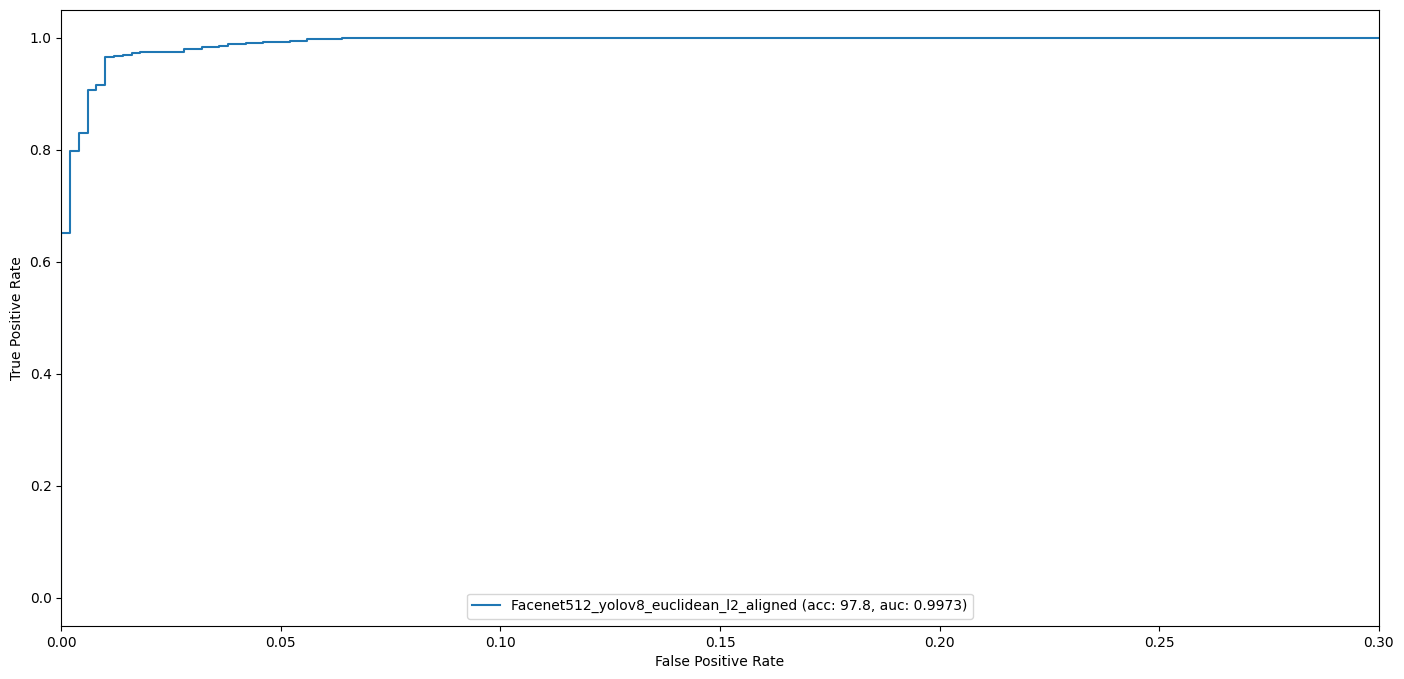

In [57]:
# to show all models in same graph
plt.figure(figsize=(17, 8))

for model_name in models:
    # to show graphs model by model
    # plt.figure(figsize=(17, 8))
    accs = []
    aucs = []
    fprs = []
    tprs = []
    labels = []
    for distance_metric in distance_metrics:
        # for detector_backend in robust_face_detectors:
        for detector_backend in detectors:
            for align in alignment:
                if detector_backend == "skip" and align is True:
                    continue
                acc, auc, fpr, tpr, label = plot_roc(model_name, detector_backend, distance_metric, align)
                accs.append(acc)
                aucs.append(auc)
                fprs.append(fpr)
                tprs.append(tpr)
                labels.append(label)
    # ---------------------------------
    #sort by auc
    df = pd.DataFrame({"acc": accs, "auc": aucs, "fpr": fprs, "tpr": tprs, "label": labels})
    # df = df.sort_values(by = ["auc"], ascending = False).reset_index()
    df = df.sort_values(by = ["acc"], ascending = False).reset_index()

    for index, instance in df.iterrows():
        fpr = instance["fpr"]
        tpr = instance["tpr"]
        auc = instance["auc"]
        acc = instance["acc"]
        label = instance["label"]

        plt.plot(fpr, tpr, label=label)
        plt.ylabel("True Positive Rate")
        plt.xlabel("False Positive Rate")
        plt.legend(loc="lower center", ncol=2)
        # normally this should be [0, 1] but that scale makes graphs not legible
        # plt.xlim([0, 1])
        plt.xlim([0, 0.3])

        # to show the best auc value
        break

    # to show graphs model by model
    # plt.show()
    # print("----------------")

# to show all models in same graph
plt.show()